# ML: Naive Bayes classification

In [2]:
## classification is one form of unsupervised learning.
## all data points are annotated with a label -- the points with the same label are part of the same class
## there can be two or more labels
## the data points may have certain features that can be used to predict the classification

In [3]:
## naive bayes can be demonstrated using Gaussian distributions

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

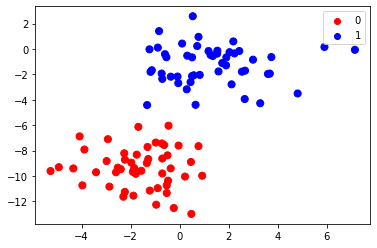

In [5]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();
#plt.colorbar();

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [7]:
## NB fitted two-dimensional Gaussian distribution to the data
## means and variances define the distributions completely
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]
Standard deviations: [[2.06097005 2.47716872]
 [3.33164807 2.22401384]]


In [8]:
## let's plot these distributions -- with a helper function that plots an ellipse

def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

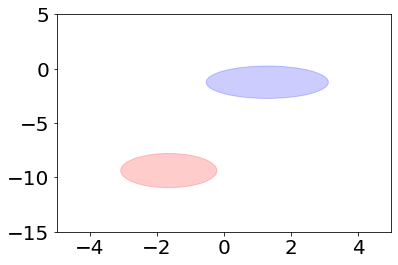

In [9]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red")
plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue");

In [10]:
## the accuracy score gives a measure about how well the labels were predicted
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)

Accuracy score is 1.0


In [11]:
## score was max -- we predicted already seen data

## Another example

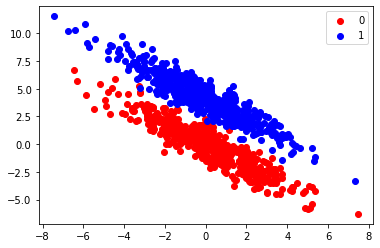

In [12]:
## let's generate some data using multivariate normal distributions
cov=np.array([[ 4.68, -4.32], [-4.32,  4.68]])
mean1 = [0,0]
mean2 = [0,4]
n=500
x1 = np.random.multivariate_normal(mean1, cov, n).T
x2 = np.random.multivariate_normal(mean2, cov, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();

In [13]:
## two clusters seem to be quite separate -- try NB on this data
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y)

GaussianNB()

In [14]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[ 0.14057531 -0.12393691]
 [-0.18046116  4.24404966]]
Standard deviations: [[4.54386985 4.56464301]
 [4.43949568 4.52764075]]


Accuracy score is 0.835


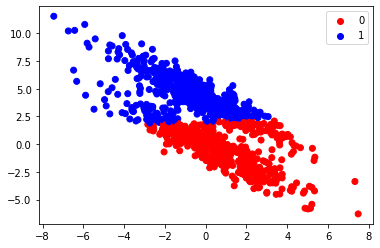

In [15]:
y_fitted = model.predict(X)
colors=np.array(["red", "blue"])
plt.scatter(X[:,0], X[:,1], color=colors[y_fitted])
plt.scatter([], [], color="red", label="0")
plt.scatter([], [], color="blue", label="1")
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_fitted)
plt.legend()
print("Accuracy score is", acc)

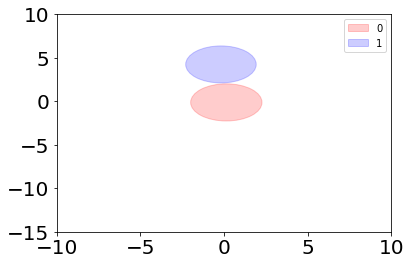

In [16]:
## the score is quite good, but the algorith didn't have good models for the data
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-15, 10)
e1=plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red", label="0")
e2=plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue", label="1")
plt.legend([e1, e2], ["0", "1"]);

In [17]:
## NB classification tries to model the data using Gaussian distributions, which are aligned on y and x axes
## in this examples, we would have needed "tilted" Gaussian distributions

## Text classification

In [18]:
## we try classify a set of messages posted on a forum
## this messages were divided into groups by the topics
## let's try the classification testing, but first load the data
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [19]:
## we concentrate on four messages categories only
## fetch_20newsgroups easily splits data into training and testing data
categories = ['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.crypt']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [20]:
print("Training data:", "Data:", str(type(train.data)), len(train.data), "Target:", str(type(train.target)), len(train.target))
print("Test data:", "Data:", str(type(test.data)), len(test.data), "Target", str(type(test.data)), len(test.target))

Training data: Data: <class 'list'> 2364 Target: <class 'numpy.ndarray'> 2364
Test data: Data: <class 'list'> 1574 Target <class 'list'> 1574


In [21]:
## we use as features the frequencies of each word in the dataset
## there are as many features as there are distinct words in the dataset
## as the features are now counts, it is sensible to use multinomial distribution instead of Gaussian

## each message category has its own distribution
## class CountVectorizer from scikit-learn contverts the messages in form of text strings to feature vectos
## this conversion can be integrated with the model we are using, so it happens withn the fit method using the make_pipeline tool
#from sklearn.feature_extraction.text import TfidfVectorizer  # an alternative feature extractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels_fitted = model.predict(test.data)
print("Accuracy score is", accuracy_score(labels_fitted, test.target))

Accuracy score is 0.920584498094028


In [22]:
## the classifier seems to be working well
## now we use separate data for testing the model
vec = CountVectorizer()
features=vec.fit_transform(train.data)
print("Type of feature matrix:", type(features))
print(features[0,:])        # print the features of the first sample point

Type of feature matrix: <class 'scipy.sparse.csr.csr_matrix'>
  (0, 15373)	1
  (0, 18962)	3
  (0, 21852)	5
  (0, 9553)	4
  (0, 34790)	6
  (0, 13317)	6
  (0, 19099)	1
  (0, 16034)	1
  (0, 30377)	1
  (0, 26624)	1
  (0, 23858)	1
  (0, 20509)	1
  (0, 15109)	2
  (0, 11079)	1
  (0, 23854)	2
  (0, 32729)	1
  (0, 20381)	1
  (0, 2100)	1
  (0, 12580)	1
  (0, 18085)	1
  (0, 27158)	1
  (0, 31686)	6
  (0, 23118)	1
  (0, 25400)	1
  (0, 17310)	1
  :	:
  (0, 11100)	1
  (0, 27521)	1
  (0, 29104)	1
  (0, 5980)	1
  (0, 30641)	1
  (0, 27517)	1
  (0, 12577)	1
  (0, 25336)	1
  (0, 24025)	1
  (0, 18436)	1
  (0, 29505)	1
  (0, 29494)	1
  (0, 11068)	1
  (0, 21787)	1
  (0, 23460)	1
  (0, 34425)	1
  (0, 16809)	1
  (0, 17883)	1
  (0, 31398)	1
  (0, 34222)	1
  (0, 25926)	1
  (0, 6320)	1
  (0, 29697)	1
  (0, 19220)	1
  (0, 20579)	1


In [23]:
## the feature matrix is stored in sparse format, the nonzero counts are stored
## how many words were in the first message?
print("Number of words:", features[0,:].sum())
col = vec.vocabulary_["it"]   # Get the column of 'it' word in the feature matrix
print(f"Word 'it' appears in the first message {features[0, col]} times.")
print()
print(train.data[0])   # Let's print the corresponding message as well
#print(vec.get_feature_names())

Number of words: 177
Word 'it' appears in the first message 2 times.

From: jgfoot@minerva.cis.yale.edu (Josh A. Goldfoot)
Subject: Re: Organized Lobbying for Cryptography
Organization: Yale University
Lines: 21
Distribution: inet
Reply-To: jgfoot@minerva.cis.yale.edu
NNTP-Posting-Host: minerva.cis.yale.edu
X-Newsreader: TIN [version 1.1 Minerva PL9]

Shaun P. Hughes (sphughes@sfsuvax1.sfsu.edu) wrote:
: In article <1r3jgbINN35i@eli.CS.YALE.EDU> jgfoot@minerva.cis.yale.edu writes:
[deletion]
: >Perhaps these encryption-only types would defend the digitized porn if it
: >was posted encrypted?
: >
: >These issues are not as seperable as you maintain.
: >

: Now why would anyone "post" anything encrypted? Encryption is only of 
: use between persons who know how to decrypt the data.

: And why should I care what other people look at? 

I was responding to another person (Tarl Neustaedter) who held that the
EFF wasn't the best organization to fight for crytography rights since the
EFF also

In [24]:
## exercise 01 blob classification
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

def blob_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_fitted = model.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_fitted)
    return acc

In [25]:
X,y = datasets.make_blobs(100, 2, centers=2, random_state=2, cluster_std=2.5)
print("The accuracy score is", blob_classification(X, y))
a=np.array([[2, 2, 0, 2.5],
            [2, 3, 1, 1.5],
            [2, 2, 6, 3.5],
            [2, 2, 3, 1.2],
            [2, 4, 4, 2.7]])
accs=[]
for row in a:
    X,y = datasets.make_blobs(100, int(row[0]), centers=int(row[1]),
                                random_state=int(row[2]), cluster_std=row[3])
    accs.append(blob_classification(X, y))
print(repr(np.hstack([a, np.array(accs)[:,np.newaxis]])))

The accuracy score is 0.92
array([[2.  , 2.  , 0.  , 2.5 , 0.76],
       [2.  , 3.  , 1.  , 1.5 , 0.96],
       [2.  , 2.  , 6.  , 3.5 , 0.84],
       [2.  , 2.  , 3.  , 1.2 , 1.  ],
       [2.  , 4.  , 4.  , 2.7 , 0.8 ]])


In [26]:
## another solution
def blob_classification(X, y):
    model = GaussianNB()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,train_size=0.75)
    model.fit(X_train, y_train)
    y_fitted = model.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_fitted)
    return acc

In [27]:
## exercise 02: plant classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import metrics

def plant_classification():
    #1_load dataset
    X, y = load_iris(return_X_y = True)
    #2_split into testing and training
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    #3_fit training daata with Gaussian NB
    model = naive_bayes.GaussianNB()
    model.fit(X_train, y_train)
    #4_pedict labels
    labels_fitted = model.predict(X_test)
    #5_accuracy
    accuracy = metrics.accuracy_score(y_test, labels_fitted)
    return accuracy

In [28]:
print(f"Accuracy is {plant_classification()}")

Accuracy is 0.9666666666666667


In [29]:
## another solution
def plant_classification():
    data = load_iris()
    X = data.data
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
    model = naive_bayes.GaussianNB()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return metrics.accuracy_score(y_test, y_predicted)

In [30]:
## exercise 03: word classification 
from collections import Counter
import urllib.request
from lxml import etree

import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

def load_finnish():
    finnish_url="https://www.cs.helsinki.fi/u/jttoivon/dap/data/kotus-sanalista_v1/kotus-sanalista_v1.xml"
    filename="kotus-sanalista_v1.xml"
    load_from_net=False
    if load_from_net:
        with urllib.request.urlopen(finnish_url) as data:
            lines=[]
            for line in data:
                lines.append(line.decode('utf-8'))
        doc="".join(lines)
    else:
        with open(filename, "rb") as data:
            doc=data.read()
    tree = etree.XML(doc)
    s_elements = tree.xpath('/kotus-sanalista/st/s')
    return list(map(lambda s: s.text, s_elements))

def load_english():
    with open("words", encoding="utf-8") as data:
        lines=map(lambda s: s.rstrip(), data.readlines())
    return lines

def get_features(a):
    alfabeto =  list("abcdefghijklmnopqrstuvwxyzäö-")
    array = []
    for palavra in a:
        histograma = [0] * 29
        letras = list(palavra)
        for j in letras:
            n=0
            while n<29:
                if j == alfabeto[n]:
                    histograma[n]= histograma[n]+1
                    break
                n = n+1
        array.append(histograma)
    return np.array(array)

def contains_valid_chars(s):
    alfabeto =  list("abcdefghijklmnopqrstuvwxyzäö-")
    palavra = list(s)
    result = True
    for caracter in palavra:
        if caracter not in alfabeto:
            result = False
    return result

def get_features_and_labels():
    finnish = load_finnish()
    finnishclean = []
    for i in finnish:
        if contains_valid_chars(i.lower()):
            finnishclean.append(i)
    features_f = get_features(finnishclean)
    labels_f = np.zeros(len(features_f))
    english = list(load_english())
    englishclean = []
    for j in english:
        if j[0].isupper():
            continue
        elif contains_valid_chars(j.lower()):
            englishclean.append(j)
    features_e = get_features(englishclean)
    labels_e = np.ones(len(features_e))
    return np.concatenate((features_f, features_e)), np.concatenate((labels_f,labels_e))

def word_classification():
    X, y = get_features_and_labels()
    model = MultinomialNB()
    scores = cross_val_score(model, X, y, cv = model_selection.KFold(n_splits = 5, shuffle=True ,random_state=0))
    return list(scores)

In [31]:
type(word_classification())

list

In [32]:
## originales

[0.89370104, 0.89678673, 0.89758288, 0.89685042, 0.89643642]

[0.89370104, 0.89678673, 0.89758288, 0.89685042, 0.89643642]

In [33]:
print("Accuracy scores are:", word_classification())

Accuracy scores are: [0.8937328832558435, 0.8968822648960224, 0.8975510334065794, 0.8968185726569218, 0.8965638037005191]


In [34]:
## alternative solution

import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

alphabet="abcdefghijklmnopqrstuvwxyzäö-"
alphabet_set = set(alphabet)

# Returns a list of Finnish words
def load_finnish():
    finnish_url="https://www.cs.helsinki.fi/u/jttoivon/dap/data/kotus-sanalista_v1/kotus-sanalista_v1.xml"
    filename="src/kotus-sanalista_v1.xml"
    load_from_net=False
    if load_from_net:
        with urllib.request.urlopen(finnish_url) as data:
            lines=[]
            for line in data:
                lines.append(line.decode('utf-8'))
        doc="".join(lines)
    else:
        with open(filename, "rb") as data:
            doc=data.read()
    tree = etree.XML(doc)
    s_elements = tree.xpath('/kotus-sanalista/st/s')
    return list(map(lambda s: s.text, s_elements))

def load_english():
    with open("src/words", encoding="utf-8") as data:
        lines=map(lambda s: s.rstrip(), data.readlines())
    return lines

def get_features(a):
    columns=len(alphabet)
    n=a.shape[0]
    f=np.zeros((n, columns))
    for i, s in enumerate(a):
        counts=Counter(s)
        for j, c in enumerate(alphabet):
            f[i, j] = counts[c]
    return f

def contains_valid_chars(s):
    return alphabet_set.issuperset(s)

def get_features_and_labels():
    lst=load_finnish()
    finnish=np.array(list(filter(contains_valid_chars, map(lambda s: s.lower(), lst))))
    lines = load_english()
    lst=filter(contains_valid_chars,
               map(lambda s: s.lower(),
                   filter(lambda s: s[0].islower(), lines)))
    english=np.array(list(lst))
    n1=finnish.shape[0]
    f1=get_features(finnish)
    n2=english.shape[0]
    f2=get_features(english)
    y=np.hstack([[0]*n1, [1]*n2])
    X = np.vstack([f1, f2])
    return X, y

def word_classification():
    X, y = get_features_and_labels()
    model = MultinomialNB()
    cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
    v=cross_val_score(model, X, y, cv=cv)
    return v

In [35]:
## exercise 04 (spam detection)
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import gzip

def spam_detection(random_state=0, fraction=0.1):
    viluspam ="spam.txt.gz"
    viluham = "ham.txt.gz"

    with gzip.open(viluspam,'r') as fspam:
        #arspam = np.array(fspam)
        arspam = np.array(fspam.readlines())
    lspam = int(fraction*len(arspam))
#    arspam = np.array(list(arspam[0:lspam]))
    with gzip.open(viluham,'r') as fham:
        #arham = np.array(fham)
        arham = np.array(fham.readlines())
    lham = int(fraction * len(arham))
    X = np.concatenate([arham[0:lham],arspam[0:lspam]])
#    print(X.shape)
    hy = [0]*lham
    sy = [1]*lspam
    y = np.array([hy+sy]).T
    model =MultinomialNB()
    cv = CountVectorizer()
    Xfeats = cv.fit_transform(X)
#    print(Xfeats[0,:])
    ts = 0.75 # train size
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeats, y, random_state=random_state, train_size = ts)

    model.fit(Xtrain, ytrain)

    fitted = model.predict(Xtest)

    acc = accuracy_score(ytest, fitted)
#    print(cv.vocabulary_)
#    print(cv.get_feature_names())

    toinen = int((1-ts)*(lham+lspam))
    return acc, toinen, int((1-acc)*toinen)

In [36]:
spam_detection()

C:\Users\annas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.96, 75, 3)

In [37]:
accuracy, total, misclassified = spam_detection()
print("Accuracy score:", accuracy)
print(f"{misclassified} messages miclassified out of {total}")

Accuracy score: 0.96
3 messages miclassified out of 75


C:\Users\annas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
## another solution

import gzip
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def load_ham(filename="src/ham.txt.gz"):
    with gzip.open(filename) as f:
        lines = f.readlines()
    return lines

def load_spam(filename="src/spam.txt.gz"):
    with gzip.open(filename) as f:
        lines = f.readlines()
    return lines

def spam_detection(random_state=0, fraction=1.0):
    vec = CountVectorizer()
    ham = load_ham()
    spam = load_spam()
    ham = ham[:int(fraction*len(ham))]
    spam = spam[:int(fraction*len(spam))]
    X = vec.fit_transform(ham+spam)
    n1 = len(ham)
    n2 = len(spam)
    if False:   # Print some info. From first two (ham) messages, show counts of common words.
        print(X.shape)
        temp = X[0:2, :].toarray()   # Vectorizer returns sparse array, convert to dense array
        idx = temp[:, :] != 0
        idx = temp.all(axis=0)
        names = vec.get_feature_names()
        df = pd.DataFrame(temp[:, idx], columns=np.array(names)[idx])
        print(df.T)
    y = np.hstack([[0]*n1, [1]*n2])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.75, test_size=0.25)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_fitted = model.predict(X_test)
    acc = model.score(X_test, y_test)
    return acc, len(y_test), (y_test != y_fitted).sum()

# ML: Clustering
similar to classification, the aim is to give a label to each data point. unlike it, we are not given any example of labels associated to the data points. from the data, we must inferwhich data points belong to the same cluster. this can be achive using some notion of distance between the data points -- data points in the same clsuter are somehow close to each other.
one of the simplest methos is k-means clustering. it produces clusters that is optimal in the following sense:
<br>-- the centre of each cluster is the average of all points in the cluster
<br>-- any point in a cluster is closer to its center than to a center of any other cluster
the k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. next, k points from the data set are chosen randomly as cluster centers. then:
<br> -- any data point is set t obelong to a cluster, whose center is closest to it
<br> -- for each cluster a new center is chosen as the average of the data points in the cluster
<br> this procedure is repeated until the clusters are fixed. this is an Expectation-Mazimization (EM) algorithm.


## simple example

In [39]:
## scikit-learn has an implementation of the k-means algorithm.
## let's apply it to a set of random generaated blobs, without labels
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


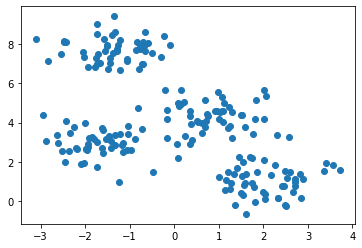

In [41]:
## plot the points, but without coloring the points using labels
plt.scatter(X[:,0],X[:,1]);

In [42]:
## you can discern four clusters in the data set
## let's see if k-means clustering algorithm recovers these clusters.
## first we create the instance of the k-means model by giving the number of cluster s(4) as a hyperparameter
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[-1.36512238  7.70188306]
 [ 0.86008475  4.31501411]
 [ 2.07464749  0.9869902 ]
 [-1.70639178  2.9104771 ]]


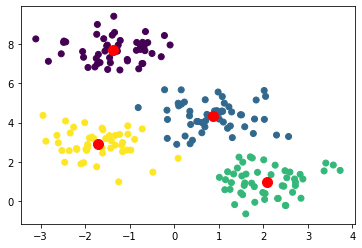

In [43]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

In [44]:
## the clustering looks correct.
## to get a more quantitative measure of success we can get the accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.0


In [45]:
## the cluster match perfectly to the original, their labels might be permute
## select randomly one point from each cluster and check their labels from the original data labels
## use this label for the whole cluster -- renaming the clusters, not reclustering the data
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [46]:
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[3, 0, 1, 2]


In [47]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.99


In [48]:
## the k-means algorithm works well in this case, there can be several problems
## EM algorithm always converges, but might converge into a local maximum
##for avoiding this, EM type algorithms are usually run several times. starting from a different point
## for instance, in the sci-kit implementation, the algorithm restarts 10 times

## more complicated example

In [49]:
## k-means akgirithm can have difficuties when the clusters are not convex shapes
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

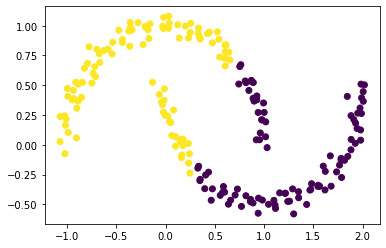

In [50]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

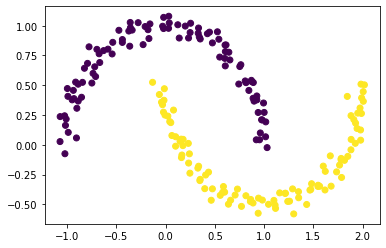

In [51]:
## clustering doew not work well, it is not possible to separate the clusters with a line
## we colud embed this data set into higher dimensional space, where the separations is possible
## then execute the k-means

##alternatively we can use another type of clustering algorithm -- dbscan algorithm
## is based on densities, works well on data whise density in the clusters is uniform
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_)

In [ ]:
## dbscan does not require to specif the number of clusters
## the algorithm depends on another hyperparameter -- a threshold for distance

## clustering digits

In [53]:
## sikit-learn has a set of 1797 images of handwritten digits with the labels 0,...,9
## the images have low resolution (64px)
## let's see how the machine learning mehod works with this kind of data

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

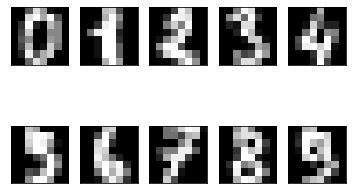

In [54]:
## let's see how the data points look like, plotting the first 10

fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, digits.data[:10]):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [55]:
## let's cluster the data points into ten clusters

model=KMeans(n_clusters = 10, random_state=0)
model.fit(digits.data)
model.cluster_centers_.shape

(10, 64)

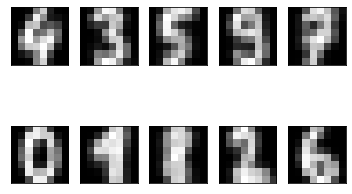

In [56]:
## we have 10 cluster centers, which are images of 64px
## let's see how they look like

fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, model.cluster_centers_):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [57]:
## these numbers can be recognized with the exception of maybe number 8
## what is the accuracy score of this clustering?

permutation3 = find_permutation(10, digits.target, model.labels_)
print(permutation3)
acc = accuracy_score(digits.target, [ permutation3[label] for label in model.labels_])
print("Accuracy score is", acc)

[4, 3, 5, 9, 7, 0, 1, 8, 2, 6]
Accuracy score is 0.7935447968836951


In [63]:
## exercise 05 (plant clustering)
from sklearn.datasets import load_iris
from sklearn import metrics
import scipy
import numpy as np
from sklearn.cluster import KMeans

def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        # Choose the most common label among data points in the cluster
        new_label=scipy.stats.mode(real_labels[idx])[0][0]
        permutation.append(new_label)
    return permutation

def plant_clustering():
    #1_load dataset
    X, y = load_iris(return_X_y = True)
    #3_fit training daata with Gaussian NB
    model = KMeans(3, random_state=0)
    model.fit(X)
    #4_fix y with permutation
    permutation = find_permutation(3, y, model.labels_)
    #5_obtain new labels
    new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
    #6_calculate accuracy
    accuracy = metrics.accuracy_score(y, new_labels)
    return accuracy

In [70]:
plant_clustering()

0.8933333333333333

In [69]:
## alternative solution

ef plant_clustering():
    data = load_iris()
    X = data.data
    y = data.target
    model = KMeans(3, random_state=0)
    model.fit(X)
    permutation = find_permutation(3, y, model.labels_)
    acc = metrics.accuracy_score(y, [ permutation[label] for label in model.labels_])
    return acc

In [ ]:
## exercise 06 (nonconvex clusters)

# ML: Principal component analysis